### (Trader Performance vs Market Sentiment)



In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
data1=pd.read_csv("fear_greed_index (1).csv")
data1.head(3)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03


In [53]:
data2= pd.read_csv("historical_data (1).csv")
data2.head(3)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12


In [54]:
data1.info()

<class 'pandas.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   timestamp       2644 non-null   int64
 1   value           2644 non-null   int64
 2   classification  2644 non-null   str  
 3   date            2644 non-null   str  
dtypes: int64(2), str(2)
memory usage: 82.8 KB


In [55]:
data1.shape

(2644, 4)

In [56]:
data1.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [57]:
data2.duplicated().sum()

np.int64(0)

In [58]:
data2.shape

(211224, 16)

In [59]:
data2.info()

<class 'pandas.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  str    
 1   Coin              211224 non-null  str    
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  str    
 6   Timestamp IST     211224 non-null  str    
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  str    
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  str    
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(8), int64(1

In [60]:
data2.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [61]:
data2.duplicated().sum()

np.int64(0)

In [62]:
data1['date'] = pd.to_datetime(data1['date'])



In [63]:
data2['Timestamp IST'] = pd.to_datetime(data2['Timestamp IST'],
                                        dayfirst=True)
data2['date'] = data2['Timestamp IST'].dt.date
data2['date'] = pd.to_datetime(data2['date'])


In [64]:
data2.head(3)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02


In [65]:
data1.head(3)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03


In [66]:
merged_df = data2.merge(
    data1[['date', 'classification']],
    on='date',
    how='inner'
)


In [67]:
merged_df.columns=merged_df.columns.str.lower()
merged_df.columns=merged_df.columns.str.replace(' ', '_')

In [68]:
merged_df.head(5)

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [69]:
merged_df.drop(columns=["trade_id","transaction_hash","order_id",
"crossed"], inplace=True)


In [70]:
merged_df.head(5)   

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,fee,timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0.345404,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0.005600,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0.050431,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0.050043,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0.003055,1.730000e+12,2024-12-02,Extreme Greed


In [71]:
pip install pymysql sqlalchemy

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sqlalchemy import create_engine


In [ ]:
username ="root"
password ="Anmol#17"
host = "localhost"
port = 3306
database = "primetrade"
engine= create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")


merged_df.to_sql('primetrade', con=engine, if_exists='append', index=False)
print("Data Inserted Successfully  '{primetrade}")

Data Inserted Successfully  '{primetrade}


In [ ]:
trader_day = (
    merged_df
    .groupby(['account', 'date', 'classification'])
    .agg(
        daily_pnl=('closed_pnl', 'sum'),
        trades_per_day=('closed_pnl', 'count'),
        avg_trade_size=('size_usd', 'mean'),
        win_rate=('closed_pnl', lambda x: (x > 0).mean()),
        long_ratio=('side', lambda x: (x == 'BUY').mean())
    )
    .reset_index()
)

trader_day.head()


,account,date,classification,daily_pnl,trades_per_day,avg_trade_size,win_rate,long_ratio
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,0.0,177,5089.718249,0.000000,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Extreme Greed,0.0,68,7976.664412,0.000000,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Extreme Greed,0.0,40,23734.500000,0.000000,0.000000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Extreme Greed,-21227.0,12,28186.666667,0.000000,1.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Extreme Greed,1603.1,27,17248.148148,0.444444,0.444444


In [ ]:
sentiment_pnl = (
    trader_day
    .groupby('classification')
    .agg(
        avg_daily_pnl=('daily_pnl', 'mean'),
        min_daily_pnl=('daily_pnl', 'min'),   # drawdown proxy
        max_daily_pnl=('daily_pnl', 'max')
    )
    .reset_index()
)

sentiment_pnl


,classification,avg_daily_pnl,min_daily_pnl,max_daily_pnl
0,Extreme Fear,4619.439053,-77308.420095,229058.684298
1,Extreme Greed,5161.922644,-132271.000000,449328.107544
2,Fear,5328.818161,-108604.496278,533974.662903
3,Greed,3318.100730,-358963.139984,375620.270243
4,Neutral,3438.618818,-113601.020138,194499.072534


In [ ]:
sentiment_pnl = (
    trader_day
    .groupby('classification')
    .agg(
        avg_daily_pnl=('daily_pnl', 'mean'),
        min_daily_pnl=('daily_pnl', 'min'),   # drawdown proxy
        max_daily_pnl=('daily_pnl', 'max')
    )
    .reset_index()
)

sentiment_pnl


,classification,avg_daily_pnl,min_daily_pnl,max_daily_pnl
0,Extreme Fear,4619.439053,-77308.420095,229058.684298
1,Extreme Greed,5161.922644,-132271.000000,449328.107544
2,Fear,5328.818161,-108604.496278,533974.662903
3,Greed,3318.100730,-358963.139984,375620.270243
4,Neutral,3438.618818,-113601.020138,194499.072534


In [ ]:
sentiment_winrate = (
    trader_day
    .groupby('classification')
    .agg(avg_win_rate=('win_rate', 'mean'))
    .reset_index()
)

sentiment_winrate


,classification,avg_win_rate
0,Extreme Fear,0.329659
1,Extreme Greed,0.386387
2,Fear,0.364033
3,Greed,0.343559
4,Neutral,0.355414


In [ ]:
sentiment_trades = (
    trader_day
    .groupby('classification')
    .agg(avg_trades_per_day=('trades_per_day', 'mean'))
    .reset_index()
)

sentiment_trades


,classification,avg_trades_per_day
0,Extreme Fear,133.750000
1,Extreme Greed,76.030418
2,Fear,98.153968
3,Greed,77.628086
4,Neutral,100.228723


In [ ]:
sentiment_size = (
    trader_day
    .groupby('classification')
    .agg(avg_trade_size=('avg_trade_size', 'mean'))
    .reset_index()
)

sentiment_size


,classification,avg_trade_size
0,Extreme Fear,6773.464125
1,Extreme Greed,5371.637182
2,Fear,8975.928546
3,Greed,6427.866594
4,Neutral,6963.694861


In [ ]:
sentiment_long = (
    trader_day
    .groupby('classification')
    .agg(avg_long_ratio=('long_ratio', 'mean'))
    .reset_index()
)

sentiment_long


,classification,avg_long_ratio
0,Extreme Fear,0.531533
1,Extreme Greed,0.473116
2,Fear,0.518967
3,Greed,0.471594
4,Neutral,0.472431


In [ ]:
avg_trades_per_trader = (
    trader_day
    .groupby('account')
    .agg(avg_trades_per_day=('trades_per_day', 'mean'))
    .reset_index()
)


In [ ]:
trader_day_seg1 = trader_day.merge(avg_trades_per_trader, on='account')

trader_day_seg1['trader_segment'] = trader_day_seg1['avg_trades_per_day'].apply(
    lambda x: 'Frequent' if x > 3 else 'Infrequent'
)


In [ ]:
segment_freq = (
    trader_day_seg1
    .groupby(['classification', 'trader_segment'])
    .agg(avg_daily_pnl=('daily_pnl', 'mean'))
    .reset_index()
)

segment_freq


,classification,trader_segment,avg_daily_pnl
0,Extreme Fear,Frequent,4619.439053
1,Extreme Greed,Frequent,5161.922644
2,Fear,Frequent,5328.818161
3,Greed,Frequent,3318.100730
4,Neutral,Frequent,3438.618818


In [ ]:
avg_winrate_trader = (
    trader_day
    .groupby('account')
    .agg(avg_win_rate=('win_rate', 'mean'))
    .reset_index()
)


In [ ]:
trader_day_seg2 = trader_day.merge(avg_winrate_trader, on='account')

trader_day_seg2['trader_segment'] = trader_day_seg2['avg_win_rate'].apply(
    lambda x: 'Consistent' if x >= 0.5 else 'Inconsistent'
)


In [ ]:
segment_consistency = (
    trader_day_seg2
    .groupby(['classification', 'trader_segment'])
    .agg(avg_daily_pnl=('daily_pnl', 'mean'))
    .reset_index()
)

segment_consistency


,classification,trader_segment,avg_daily_pnl
0,Extreme Fear,Consistent,5134.567611
1,Extreme Fear,Inconsistent,4602.822003
2,Extreme Greed,Consistent,4300.548067
3,Extreme Greed,Inconsistent,5250.407663
4,Fear,Consistent,1898.625987
5,Fear,Inconsistent,5476.475440
6,Greed,Consistent,2231.102191
7,Greed,Inconsistent,3395.358477
8,Neutral,Consistent,-113.302455
9,Neutral,Inconsistent,3670.047116


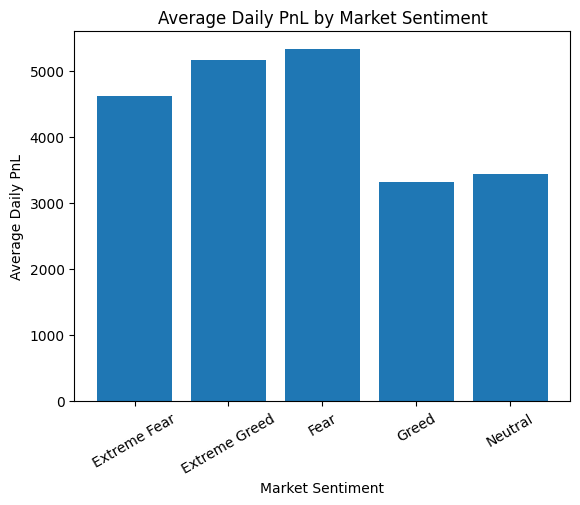

In [ ]:
pnl_sentiment = (
    trader_day
    .groupby('classification')['daily_pnl']
    .mean()
    .reset_index()
)

plt.figure()
plt.bar(pnl_sentiment['classification'], pnl_sentiment['daily_pnl'])
plt.xlabel('Market Sentiment')
plt.ylabel('Average Daily PnL')
plt.title('Average Daily PnL by Market Sentiment')
plt.xticks(rotation=30)
plt.show()


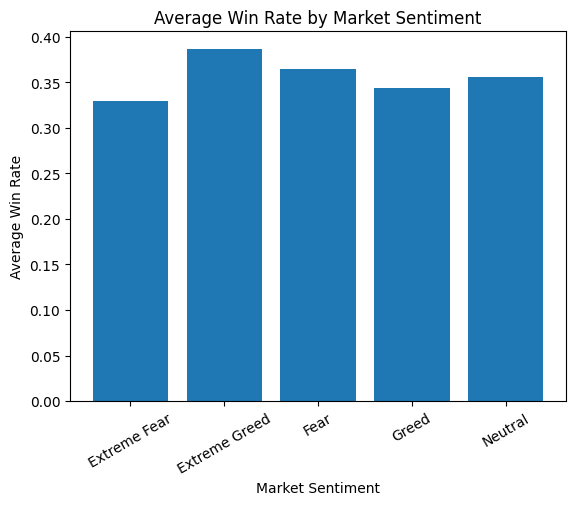

In [ ]:
winrate_sentiment = (
    trader_day
    .groupby('classification')['win_rate']
    .mean()
    .reset_index()
)

plt.figure()
plt.bar(winrate_sentiment['classification'], winrate_sentiment['win_rate'])
plt.xlabel('Market Sentiment')
plt.ylabel('Average Win Rate')
plt.title('Average Win Rate by Market Sentiment')
plt.xticks(rotation=30)
plt.show()


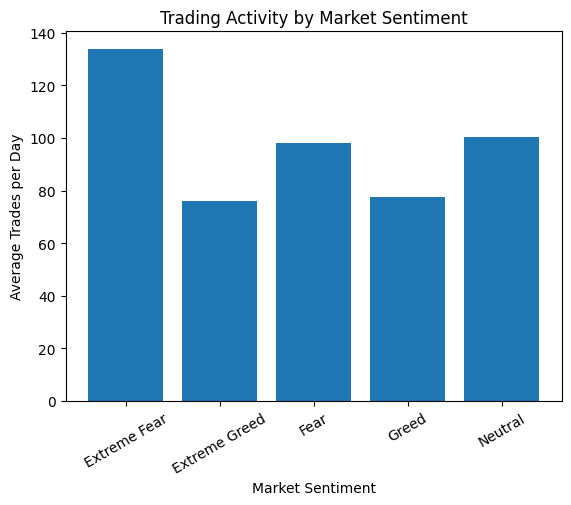

In [ ]:
trades_sentiment = (
    trader_day
    .groupby('classification')['trades_per_day']
    .mean()
    .reset_index()
)

plt.figure()
plt.bar(trades_sentiment['classification'], trades_sentiment['trades_per_day'])
plt.xlabel('Market Sentiment')
plt.ylabel('Average Trades per Day')
plt.title('Trading Activity by Market Sentiment')
plt.xticks(rotation=30)
plt.show()


In [83]:
median_trades = avg_trades['avg_trades_per_day'].median()

seg_df['segment'] = seg_df['avg_trades_per_day'].apply(
    lambda x: 'Frequent' if x >= median_trades else 'Infrequent'
)


In [84]:
segment_pnl = (
    seg_df
    .groupby(['classification', 'segment'])['daily_pnl']
    .mean()
    .unstack(fill_value=0)
)


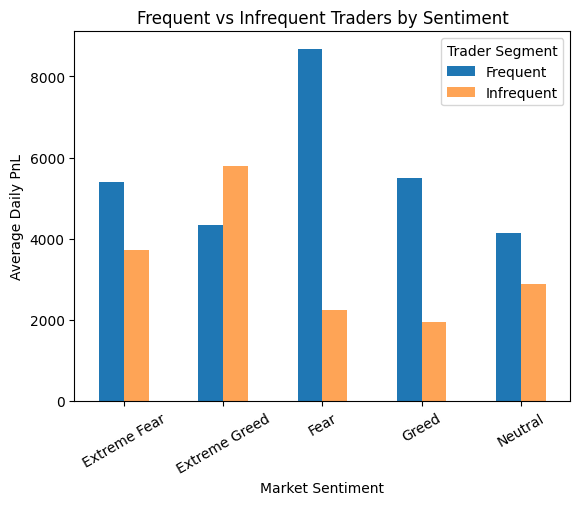

In [85]:
segment_pnl.plot(
    kind='bar',
    color={
        'Frequent': '#1f77b4',
        'Infrequent': '#fea456'
    }
)

plt.xlabel('Market Sentiment')
plt.ylabel('Average Daily PnL')
plt.title('Frequent vs Infrequent Traders by Sentiment')
plt.xticks(rotation=30)
plt.legend(title='Trader Segment')
plt.show()
